<a href="https://colab.research.google.com/github/yash-makwana/Machine-Learining-Projects/blob/main/Rainfall_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
from sklearn.preprocessing import StandardScaler

In [16]:
df = pd.read_csv('/content/Rainfall.csv')
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [18]:
df.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,365.000000,365.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,4.419399,101.506849,21.536986
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,3.934398,81.723724,10.069712
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.500000,40.000000,13.700000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,8.200000,190.000000,27.900000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000


In [33]:
df.columns = df.columns.str.strip()
df.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

In [ ]:
df = df.drop('day', axis=1)

In [28]:
df = df.dropna()
df

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...
361,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9


In [31]:
df['rainfall'] = df['rainfall'].map({'yes': 1, 'no': 0})
df['rainfall']

,rainfall
0,1
1,1
2,1
3,1
4,1
...,...
361,1
362,1
363,1
364,1


<Axes: xlabel='rainfall', ylabel='count'>

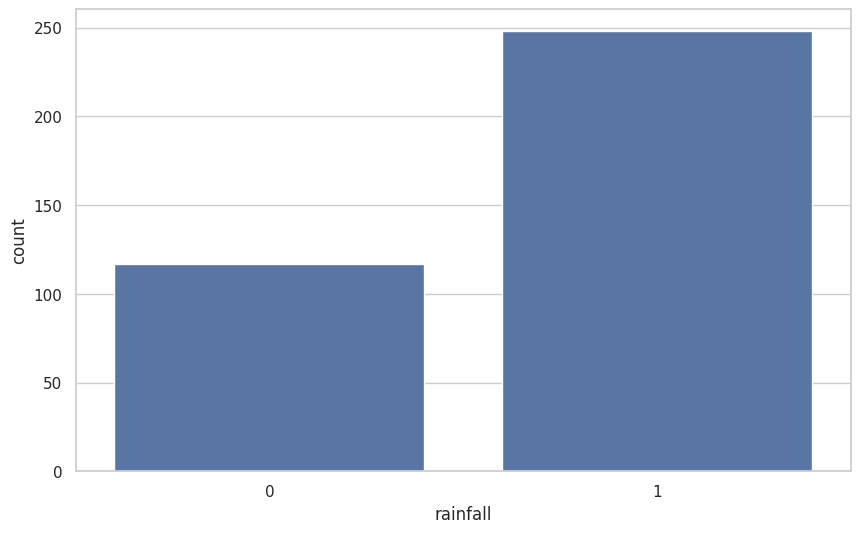

In [32]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.countplot(x='rainfall', data=df)

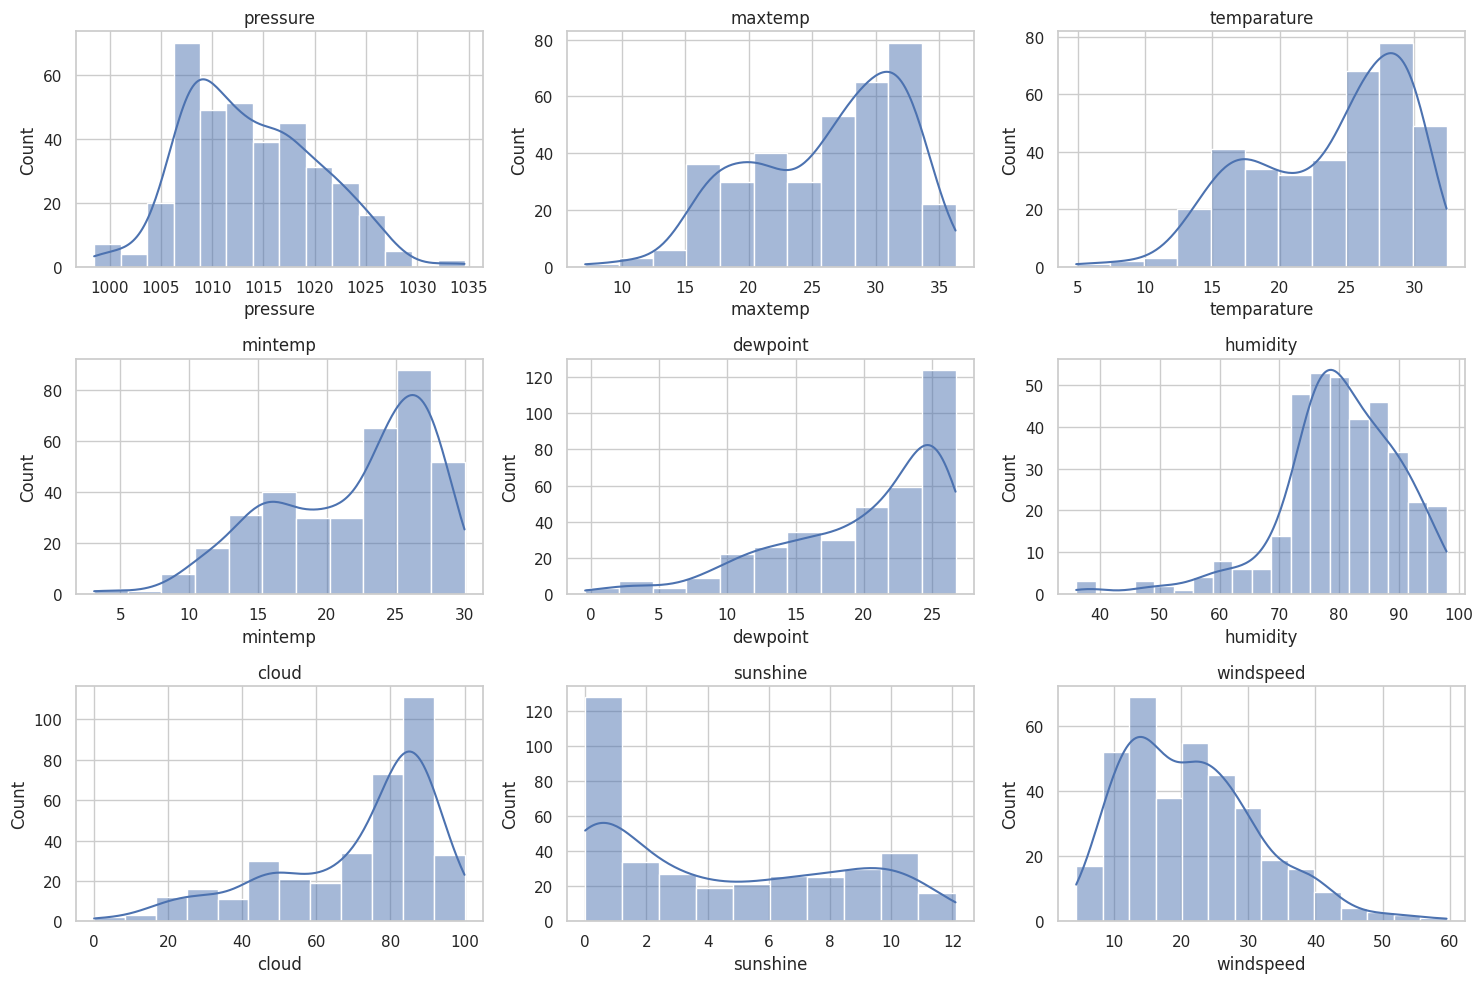

In [34]:
plt.figure(figsize=(15, 10))
for i,column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud','sunshine', 'windspeed']):
  plt.subplot(3,3,i+1)
  sns.histplot(df[column],kde=True)
  plt.title(column)

plt.tight_layout()
plt.show()


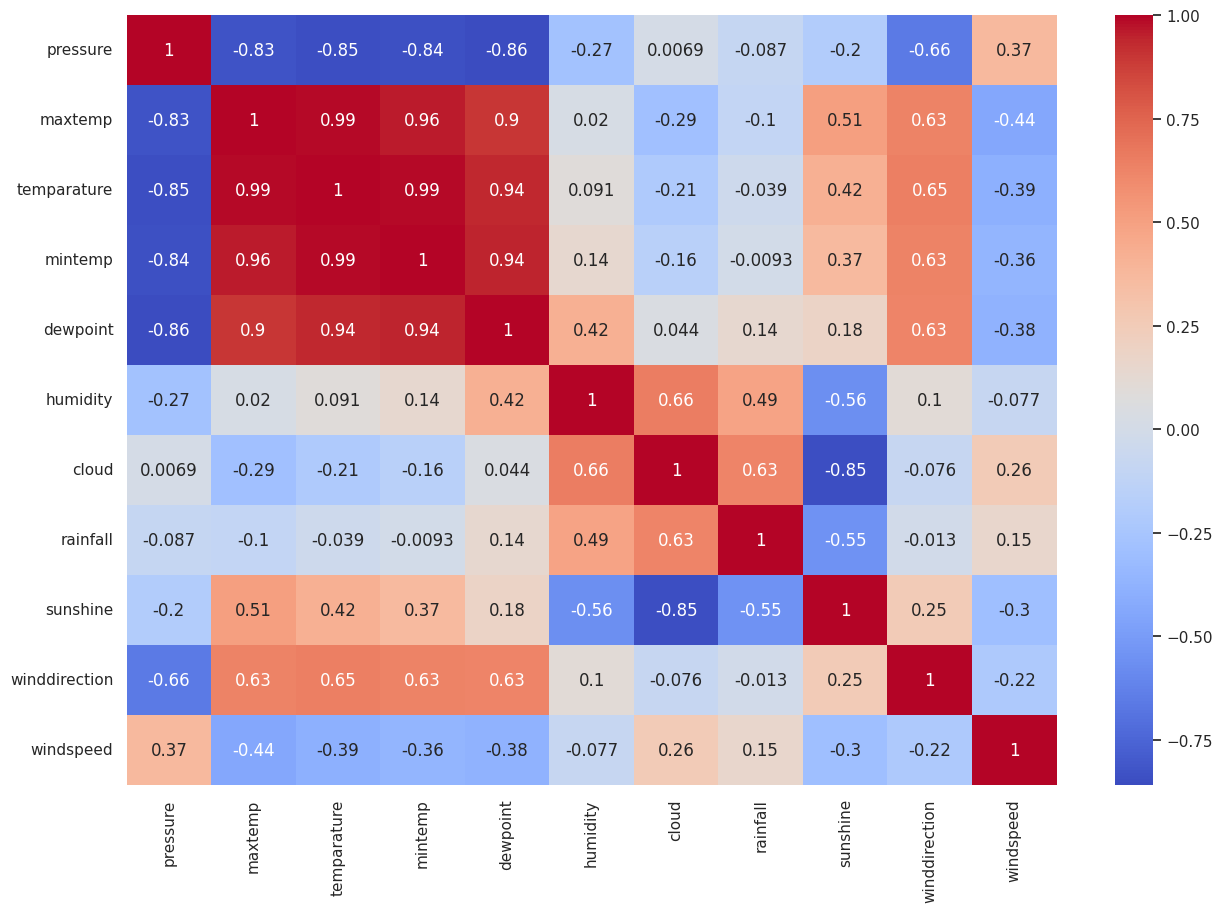

In [35]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

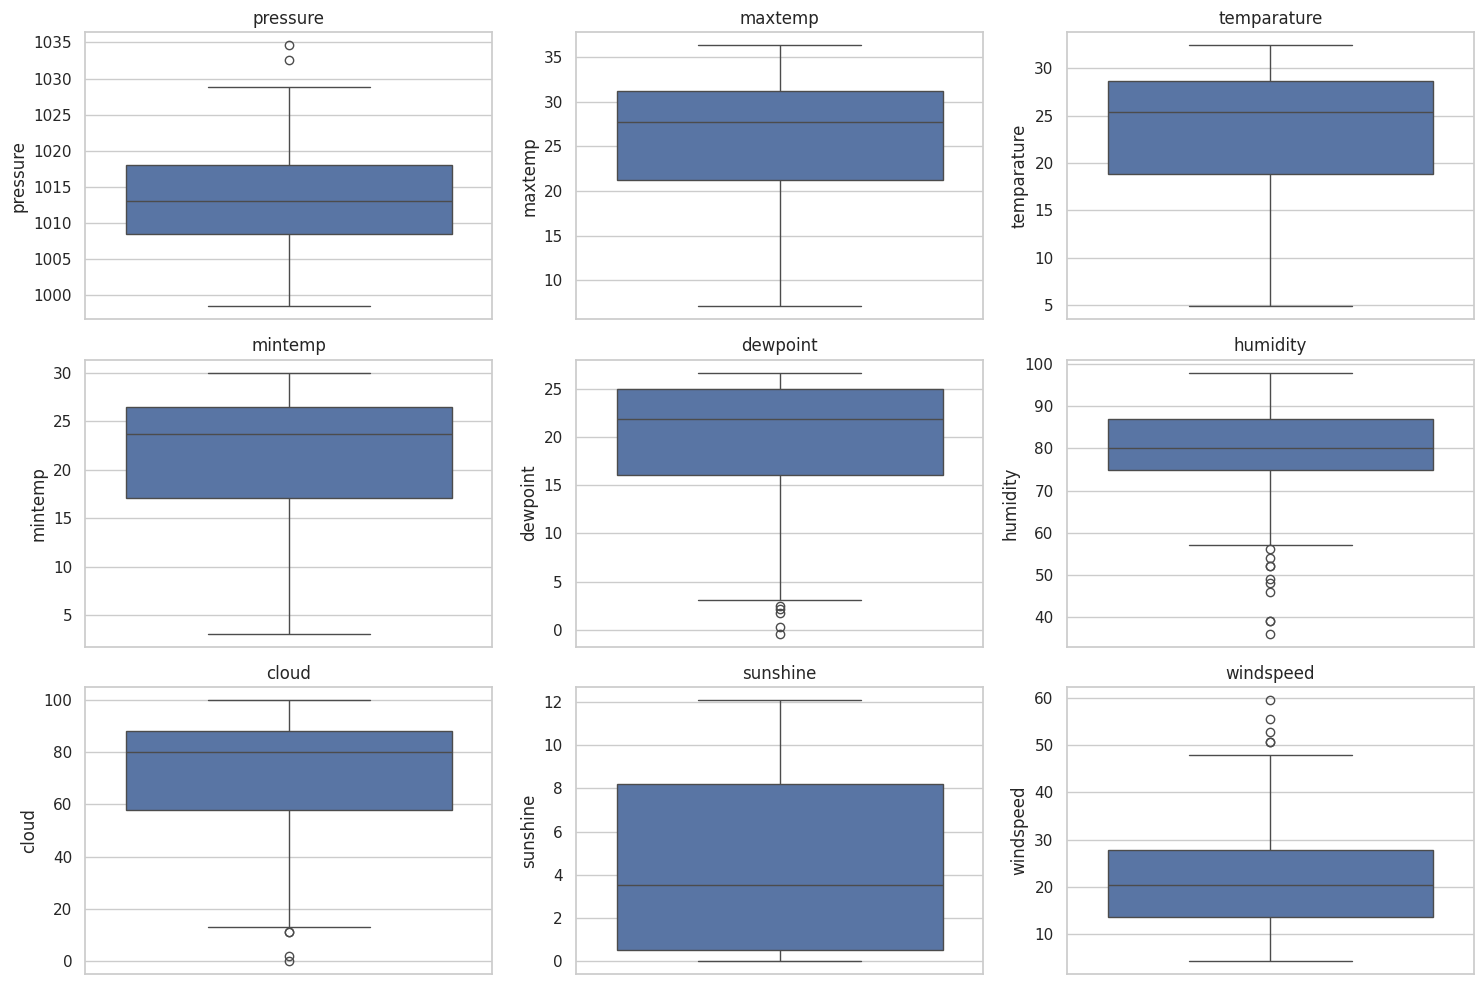

In [37]:
plt.figure(figsize=(15, 10))
for i,column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud','sunshine', 'windspeed']):
  plt.subplot(3,3,i+1)
  sns.boxplot(df[column])
  plt.title(column)

plt.tight_layout()
plt.show()

In [39]:
#drop highly correlated column
df = df.drop(['maxtemp','mintemp','temparature'], axis=1)
df

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...
361,1022.7,15.0,84,90,1,0.0,30.0,18.4
362,1026.6,12.8,75,85,1,1.0,20.0,25.9
363,1025.9,13.3,75,78,1,4.6,70.0,33.4
364,1025.3,13.3,78,86,1,1.2,20.0,20.9


In [47]:
#seprate majority and minority data
print(df['rainfall'].value_counts())
df_majority = df[df['rainfall']==1]
df_minority = df[df['rainfall']==0]

rainfall
1    248
0    117
Name: count, dtype: int64


In [48]:
#down sample majority class to match minority count
df_majority_downsampled = resample(df_majority,
                                 replace=False, #replace = false for down sampling
                                 n_samples=min(len(df_majority), len(df_minority)), #n_samples should be min of the class counts
                                 random_state=42)

In [49]:
df_majority_downsampled.shape

(117, 8)

In [50]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [51]:
df_downsampled.shape

(234, 8)

In [52]:
#shuffiling the dataframe
df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)
df_downsampled

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1012.7,25.0,92,85,1,0.7,140.0,12.5
1,1013.4,19.5,69,17,0,10.5,70.0,12.4
2,1006.1,24.4,74,27,0,10.8,220.0,8.7
3,1016.4,17.8,85,83,1,0.0,70.0,30.3
4,1021.2,8.4,66,18,0,10.1,20.0,24.4
...,...,...,...,...,...,...,...,...
229,1010.7,22.0,90,81,1,1.0,300.0,11.1
230,1009.2,21.9,92,93,1,0.0,190.0,20.5
231,1012.5,19.9,95,88,1,0.6,50.0,15.1
232,1008.3,24.1,74,29,0,5.7,10.0,4.4


In [53]:
X = df_downsampled.drop('rainfall', axis=1)
y = df_downsampled['rainfall']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:

model = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1,2,4],
    'max_features' : ['auto','sqrt','log2']
}


In [57]:
#Hyperparameter tuning
grid_search_rf = GridSearchCV(estimator=model, param_grid=param_grid_rf, cv=5, scoring='accuracy',n_jobs = -1, verbose = 2)
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [58]:
best_rf_model = grid_search_rf.best_estimator_
best_rf_model

RandomForestClassifier(random_state=42)

In [59]:
cv_score = cross_val_score(best_rf_model, X_train, y_train, cv=5).mean()
print("Cross validation score ;",cv_score)
print("mean cross validation score :",np.mean(cv_score))

Cross validation score ; 0.8085348506401138
mean cross validation score : 0.8085348506401138


In [60]:
y_pred = best_rf_model.predict(X_test)
print("Accuracy Score :",accuracy_score(y_test, y_pred))
print("Confusion Matrix :")
print(confusion_matrix(y_test, y_pred))
print("Classification Report :")
print(classification_report(y_test, y_pred))

Accuracy Score : 0.7021276595744681
Confusion Matrix :
[[17  7]
 [ 7 16]]
Classification Report :
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        24
           1       0.70      0.70      0.70        23

    accuracy                           0.70        47
   macro avg       0.70      0.70      0.70        47
weighted avg       0.70      0.70      0.70        47



In [61]:
#save model
with open('model.pkl', 'wb') as file:
    pickle.dump(best_rf_model, file)

In [63]:
#load the save pickle file and use it for prediction
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [65]:
y_pkl = loaded_model.predict(X_test)
print(accuracy_score(y_test, y_pkl))

0.7021276595744681
